In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data_train = pd.read_csv('./mnist_train.csv')
data_test = pd.read_csv('./mnist_test.csv')

data_train = data_train[:2000]
data_test = data_test[:400]

data_train.to_numpy()

data_train_copy = data_train.copy()
data_test_copy = data_test.copy()
del data_train_copy['label']
del data_test_copy['label']
X_train = data_train_copy
X_test = data_test_copy
del data_train_copy
del data_test_copy

X_train.shape, X_test.shape

X_train = X_train/255
X_test = X_test/255

encoding = OneHotEncoder(sparse_output=False, handle_unknown='error')
labels = pd.concat([data_train[['label']], data_test[['label']]])
encoding.fit(labels)
y_train = pd.DataFrame(encoding.transform(data_train[['label']]))
y_test = pd.DataFrame(encoding.fit_transform(data_test[['label']]))
y_train

X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()

def ReLU(x):
  return np.maximum(0, x)

def d_ReLU(x):
  return np.where(x >= 0, 1, 0)

def predict(input, weights_0_1, weights_1_2):
  layer_0 = input
  layer_1 = ReLU(np.dot(layer_0, weights_0_1))
  layer_2 = np.dot(layer_1, weights_1_2)
  return layer_2

np.random.seed(1)

learning_rate = 0.007
hidden_size = 80
input_size = 784
epochs = 50

weights_0_1 = (2*np.random.random((input_size,hidden_size)) - 1) / np.sqrt(input_size)
weights_1_2 = (2*np.random.random((hidden_size, 10)) - 1) / np.sqrt(hidden_size)

error_arr = []
accuracy_arr = []

for epoch in range(epochs):
  error = 0
  for i in range(len(X_train)):
    input_layer = X_train[i:i+1]
    hidden_layer = ReLU(np.dot(input_layer, weights_0_1))           

    output_layer = np.dot(hidden_layer, weights_1_2)

    error += np.sum((output_layer - y_train[i:i+1]) ** 2)

    derivative = 2*(output_layer - y_train[i:i+1])

    weight_corrections_1_2 = hidden_layer.T.dot(derivative)
    weight_corrections_0_1 = input_layer.T.dot(derivative.dot(weights_1_2.T) * d_ReLU(hidden_layer)) 

    weights_0_1 = weights_0_1 - learning_rate * weight_corrections_0_1
    weights_1_2 = weights_1_2 - learning_rate * weight_corrections_1_2

  goal_prediction = np.argmax(y_train, axis=1)
  prediction = np.argmax(predict(X_train, weights_0_1, weights_1_2), axis=1)

  accuracy = accuracy_score(goal_prediction, prediction)

  error_arr.append(error/len(X_train))
  accuracy_arr.append(accuracy)

Графики функции потерь и accuracy

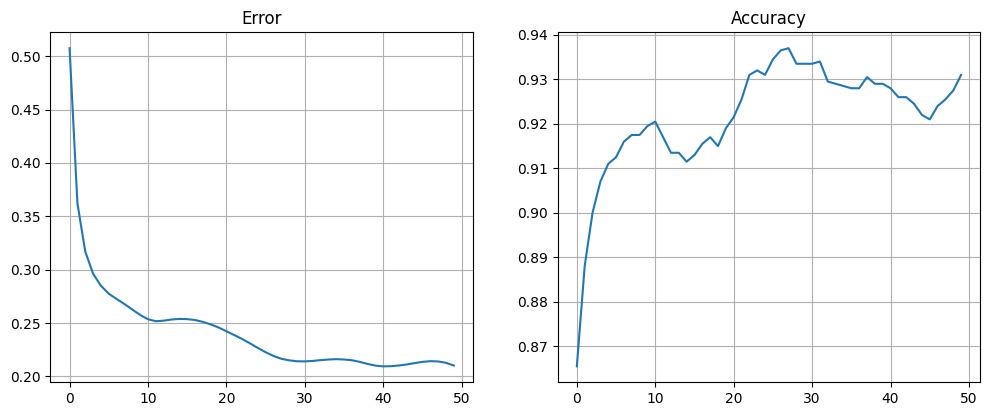

In [20]:
fig = plt.figure(figsize=(12, 10), constrained_layout=False)

subplt_1 = fig.add_subplot(221)
subplt_1.plot(np.arange(len(error_arr)), error_arr)
subplt_1.set_title('Error')
plt.grid()

subplt_2 = fig.add_subplot(222)
subplt_2.plot(np.arange(len(accuracy_arr)), accuracy_arr)
subplt_2.set_title('Accuracy')
plt.grid()